وارد کردن کتابخانه ها



In [113]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
from sklearn.metrics import confusion_matrix

پردازش داده ها

ایمپورت کردن دیتا ست و جدا کردن ستون های مستقل و وابسته

In [114]:
dataset = pd.read_csv('Proj1_Data.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

تبدیل کردن ستون(جنسیت) 
به مقادیر کمی برای برای یادگیری بهتر


In [115]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
X[:, 2] = label.fit_transform(X[:, 2])

In [116]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


تبدیل ستون موقعیت جغرافیای یه مقادیر کمی به منظور در نظر گرفتن این ویژگی برای یادگیری

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


جدا سازی مجموعه داده به 2 مجموعه تست و یادگیری
بعد از تبدیل ستون های کتگوریکال به اعداد

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

اعمال اسکیل مناسب روی داده ها برای یادگیری بهتر

In [119]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ساخت شبکه عصبی اول

مقدار دهی اولیه

In [120]:
ann1 = tf.keras.models.Sequential()

اضافه کردن لایه ورودی و اولین لایه پنهان

In [121]:
ann1.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

اضافه کردن لایه دوم پنهان

In [122]:
ann1.add(tf.keras.layers.Dense(units=6, activation='sigmoid'))

اضافه کردن لایه خروجی

In [123]:
ann1.add(tf.keras.layers.Dense(units=1, activation='relu'))

  اموزش شبکه عصبی اول

کامپایل کردن شبکه با مقادیر دلخواه

In [124]:
ann1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

آموزش شبکه روی دیتاست آموزشی

In [125]:
history1 =ann1.fit(X_train, y_train, batch_size = 32,validation_split=0.2, epochs = 100)


Epoch 1/100
200/200 [==============================] - 0s 2ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 3.1501 - accuracy: 0.7958 - val_loss: 3.1332 - val_accuracy: 0.7969

پیش بینی داده های تست روی شبکه


In [126]:
y_pred1 = ann1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)
print(y_pred1)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


به دست اوردن درصد دقت

In [127]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)
accuracy_score(y_test, y_pred1)

[[1595    0]
 [ 405    0]]


0.7975

نمودار های شبکه اول

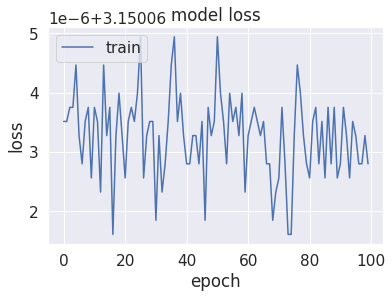

In [128]:
#  print(history.history.keys())  
plt.plot(history1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

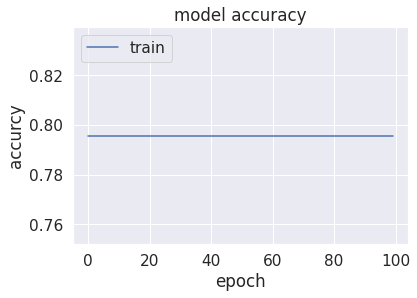

In [130]:
plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accurcy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

ساخت شبکه عصبی دوم

مقدار دهی اولیه

In [131]:
ann2 = tf.keras.models.Sequential()

اضافه کردن لایه ورودی و اولین لایه پنهان

In [132]:
ann2.add(tf.keras.layers.Dense(units=14, activation='relu'))

اضافه کردن لایه دوم پنهان

In [133]:
ann2.add(tf.keras.layers.Dense(units=14, activation='relu'))

اضافه کردن لایه خروجی

In [134]:
ann2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

اموزش شبکه عصبی

کامپایل کردن شبکه با مقادیر دلخواه

In [135]:
ann2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

آموزش شبکه روی دیتاست آموزشی

In [136]:
history2 =ann2.fit(X_train, y_train,validation_split=0.1, batch_size = 32, epochs = 100)

Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7879 - val_loss: 0.4480 - val_accuracy: 0.8175
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.8131 - val_loss: 0.4181 - val_accuracy: 0.8250
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4131 - accuracy: 0.8211 - val_loss: 0.3964 - val_accuracy: 0.8350
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8336 - val_loss: 0.3770 - val_accuracy: 0.8512
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8431 - val_loss: 0.3618 - val_accuracy: 0.8537
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8508 - val_loss: 0.3523 - val_accuracy: 0.8512
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8546 - val_loss: 0.3458 - val_accuracy: 0.8587

پیش بینی داده های تست روی شبکه


In [137]:
y_pred2 = ann2.predict(X_test)

y_pred2 = (y_pred2 > 0.5)

print(y_pred2)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


به دست اوردن درصد دقت 
```



In [138]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)
accuracy_score(y_test, y_pred2)

[[1504   91]
 [ 194  211]]


0.8575

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


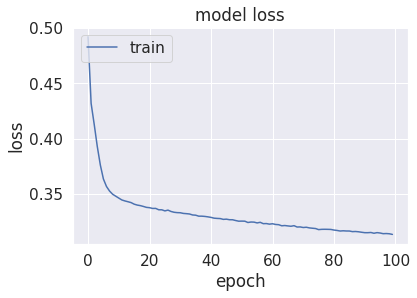

In [139]:
 print(history2.history.keys())  
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

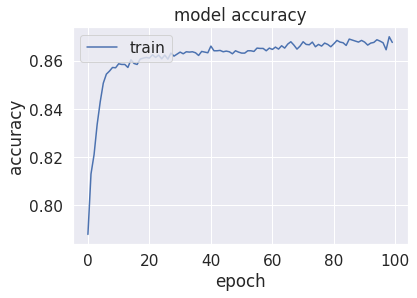

In [140]:
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

ساخت شبکه عصبی سوم با دراپ اوت

مقدار دهی اولیه

In [141]:
ann3 = tf.keras.models.Sequential()

اضافه کردن لایه ورودی و اولین لایه پنهان

In [142]:
ann3.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann3.add(tf.keras.layers.Dropout(0.1))
ann3.add(tf.keras.layers.Dense(units=6, activation='relu'))

اضافه کردن لایه دوم پنهان

In [143]:
ann3.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [144]:
ann3.add(tf.keras.layers.Dropout(0.1))

اضافه کردن لایه خروجی

In [145]:
ann3.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

اموزش شبکه عصبی

کامپایل کردن شبکه با مقادیر دلخواه

In [146]:
ann3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

آموزش شبکه روی دیتاست آموزشی

In [147]:
history3 =ann3.fit(X_train, y_train, batch_size = 32, epochs = 120)

Epoch 1/120
250/250 [==============================] - 0s 994us/step - loss: 0.5739 - accuracy: 0.7513
Epoch 2/120
250/250 [==============================] - 0s 970us/step - loss: 0.4869 - accuracy: 0.7956
Epoch 3/120
250/250 [==============================] - 0s 986us/step - loss: 0.4537 - accuracy: 0.8041
Epoch 4/120
250/250 [==============================] - 0s 949us/step - loss: 0.4348 - accuracy: 0.8104
Epoch 5/120
250/250 [==============================] - 0s 1ms/step - loss: 0.4275 - accuracy: 0.8129
Epoch 6/120
250/250 [==============================] - 0s 953us/step - loss: 0.4237 - accuracy: 0.8133
Epoch 7/120
250/250 [==============================] - 0s 950us/step - loss: 0.4185 - accuracy: 0.8174
Epoch 8/120
250/250 [==============================] - 0s 935us/step - loss: 0.4181 - accuracy: 0.8148
Epoch 9/120
250/250 [==============================] - 0s 940us/step - loss: 0.4148 - accuracy: 0.8177
Epoch 10/120
250/250 [==============================] - 0s 943us/step - los

پیش بینی داده های تست روی شبکه


In [148]:
y_pred3 = ann3.predict(X_test)

y_pred3 = (y_pred3 > 0.5)

print(y_pred3)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


به دست اوردن درصد دقت

In [154]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix = confusion_matrix(y_test, y_pred3)
print(confusion_matrix)
accuracy_score(y_test, y_pred3)

[[1532   63]
 [ 212  193]]


0.8625

dict_keys(['loss', 'accuracy'])


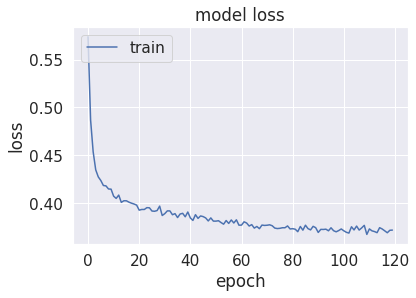

In [150]:
 print(history3.history.keys())  
plt.plot(history3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

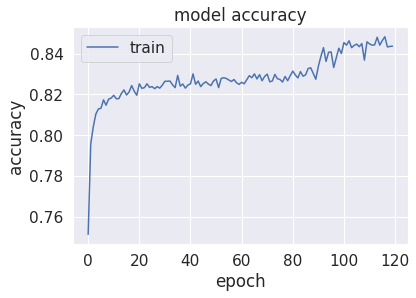

In [151]:
plt.plot(history3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()